Hard Clustering relies on assigning a point to only one cluster. Soft Clustering assigns every point to multiple clusters. In this notebook Ill explore both these approaches for the zoo dataset.

First lets take a look at the dataset:-

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
from scipy.stats import multivariate_normal as mvn # for computing mvn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zoo = pd.read_csv(r'C:\Users\Neha\Downloads\zoo.csv')

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In this dataset most of the variables are categorical. Hence when clustering using k-means its not possible to use a euclidean distance metric. So, we will explore dice, cosine and hamming distances.

We will attempt clustering using k-means, hierarchial and guassian mixture models

In [4]:
X=zoo.iloc[:,1:-1]
Y=zoo.iloc[:,-1:]

In [5]:
Y.nunique()

class_type    7
dtype: int64

In [6]:
y= np.array(Y['class_type'])

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

A = np.array(X)
dist_out = 1-pairwise_distances(A, metric="cosine")
dist_out

array([[1.        , 0.95652174, 0.23643312, ..., 0.97894501, 0.14744196,
        0.65938047],
       [0.95652174, 1.        , 0.23643312, ..., 0.97894501, 0.14744196,
        0.72531852],
       [0.23643312, 0.23643312, 1.        , ..., 0.3086067 , 0.26726124,
        0.35856858],
       ...,
       [0.97894501, 0.97894501, 0.3086067 , ..., 1.        , 0.14433757,
        0.71004695],
       [0.14744196, 0.14744196, 0.26726124, ..., 0.14433757, 1.        ,
        0.4472136 ],
       [0.65938047, 0.72531852, 0.35856858, ..., 0.71004695, 0.4472136 ,
        1.        ]])

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [9]:
X

array([[ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01],
       [-3.13165517e+00,  2.52200446e-01,  9.29418707e-01,
         8.17237403e-02, -3.89770531e-01],
       [ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01],
       [ 1.27729583e+00, -1.22574951e+00,  1.26239109e-01,
        -4.42240813e-01,  2.18646697e-01],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01],
       [ 1.32106857e+00, -1.25764259e+00, -4.21602784e-01,
         2.96659602e-01, -4.14956067e-01],
       [-3.08788243e+00,  2.20307365e-01,  3.81576814e-01,
         8.20624156e-01, -1.02337329e+00],
       [-3.13165517e+00,  2.52200446e-01,  9.29418707e-01,
         8.17237403e-02, -3.89770531e-01],
       [ 1.37362871e+00, -7.71043594e-01, -2.64542753e-01,
         1.08655033e+00

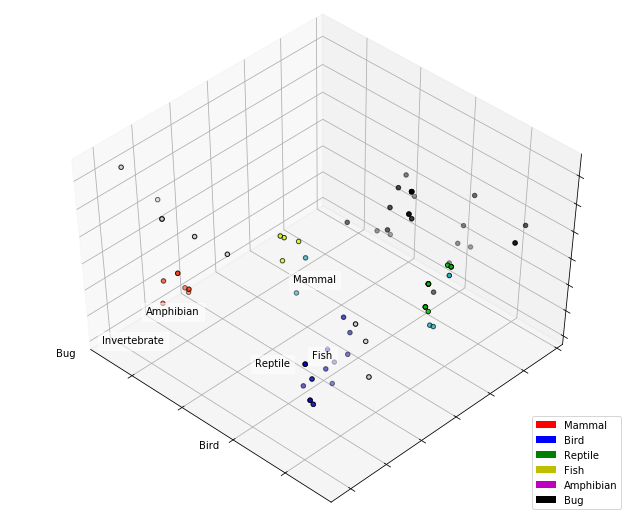

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(1, figsize=(9, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Mammal', 1), ('Bird', 2), ('Reptile', 3), ('Fish',4),('Amphibian',5),('Bug',6),('Invertebrate',7)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
pc1=X[:, 0]
pc2=X[:, 1]
pc3=X[:, 2]
##y = np.choose(y, [1,2,3,4,5,6,7]).astype(np.float)
ax.scatter(pc1, pc2, pc3, c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


classes = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
class_colours = ['r','b','g','y','m','k','c']
          
recs = []
for i in range(0,6):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)


plt.show()

In [11]:
##np.choose(y, [1,2,3,4,5,6,7]).astype(np.float)

In [12]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [13]:
pca.components_

array([[ 0.10456001, -0.04119308, -0.0634512 ,  0.06124419,  0.00871883,
        -0.09390782, -0.02933828, -0.04185234, -0.07785206,  0.07976334,
         0.00223881, -0.1136071 ,  0.9678112 , -0.07373268,  0.01443446,
         0.02117254],
       [-0.38346999,  0.17562243,  0.44032456, -0.45088946,  0.21319749,
         0.12603902, -0.01740505, -0.39915885, -0.22151954, -0.11207428,
         0.05012928, -0.02599768,  0.08205807, -0.16721638, -0.04929813,
        -0.31938261],
       [-0.0971421 , -0.36319705,  0.03545167, -0.05507425, -0.38373391,
         0.43455376,  0.41564435,  0.21975722, -0.14235988, -0.38173959,
         0.07074964,  0.24814837,  0.10453167, -0.18786348, -0.13219754,
         0.03080345],
       [ 0.16928316, -0.37916008, -0.05208206,  0.03231106, -0.0854729 ,
        -0.17314106, -0.56026464,  0.13563793, -0.28267604, -0.11587615,
         0.07356489,  0.0411779 , -0.09965866, -0.39479753,  0.17863578,
        -0.3950932 ],
       [ 0.11114837, -0.03620604, -0

In [14]:
Features = list(zoo.columns[1:-1])

<Container object of 16 artists>

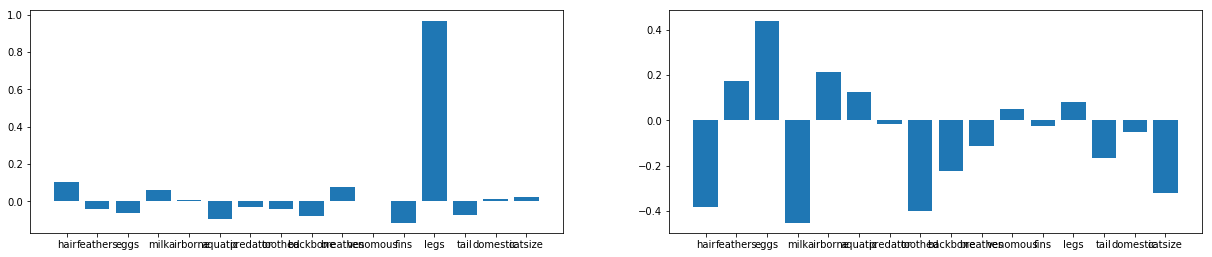

In [15]:
% matplotlib inline
fig = plt.figure(1, figsize=(21, 9))
plt.subplot(221)
x=np.arange(16)
plt.bar(x=x,height=pca.components_[0],tick_label=Features)
plt.subplot(222)
x=np.arange(16)
plt.bar(x=x,height=pca.components_[1],tick_label=Features)

In [16]:
pca.explained_variance_

array([4.39219233, 1.01776886, 0.50921555, 0.27440244, 0.17732005])

In [17]:
pca.explained_variance_ratio_

array([0.62561548, 0.14496905, 0.07253169, 0.03908536, 0.02525713])

In [19]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)


In [22]:
kmeans.cluster_centers_

array([[ 1.29436356, -1.14433059, -0.07146357, -0.02637528, -0.02425007],
       [-3.03533962, -0.07041245,  0.66071026,  0.10211565, -0.21421624],
       [ 3.49411023,  1.32731792,  0.36547184,  0.30646445,  0.05151247],
       [ 1.15039804,  0.6656561 ,  0.66129778, -0.13166875, -0.1302561 ],
       [-0.90463955,  0.89371522, -0.92472793, -0.52021225, -0.03210028],
       [-2.69906963,  0.93676133,  0.08481661,  0.95282274,  1.15764299],
       [-0.65046996, -1.12461651, -0.370234  ,  0.42163717,  0.1947428 ]])

In [24]:
y_est=kmeans.labels_+1

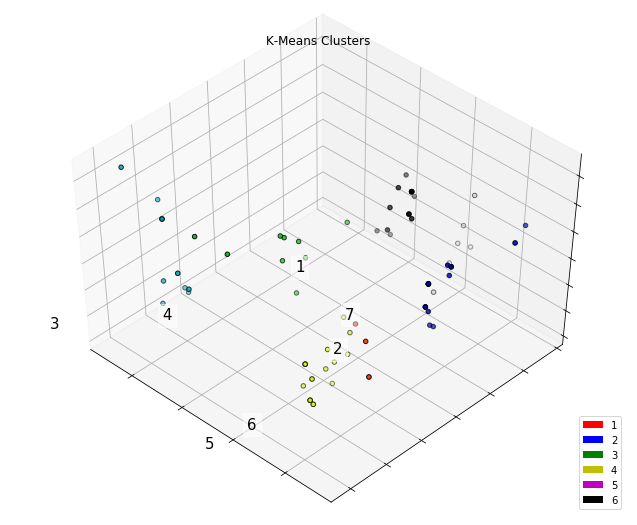

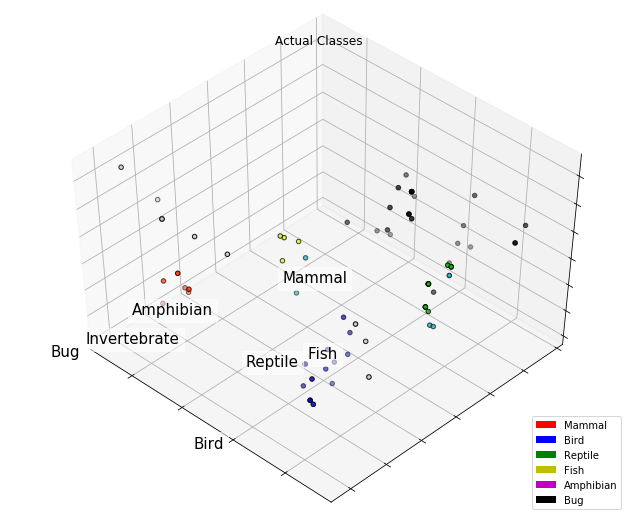

In [60]:

fig = plt.figure(1, figsize=(9, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('1', 1), ('2', 2), ('3', 3), ('4',4),('5',5),('6',6),('7',7)]:
    ax.text3D(X[y_est == label, 0].mean(),
              X[y_est == label, 1].mean() + 1.5,
              X[y_est == label, 2].mean(), name,
              horizontalalignment='center', fontsize = '15',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
pc1=X[:, 0]
pc2=X[:, 1]
pc3=X[:, 2]
##y = np.choose(y, [1,2,3,4,5,6,7]).astype(np.float)
ax.scatter(pc1, pc2, pc3, c=y_est, cmap=plt.cm.nipy_spectral,edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
classes = ['1','2','3','4','5','6','7']
class_colours = ['r','b','g','y','m','k','c']
          
recs = []
for i in range(0,6):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
plt.title('K-Means Clusters')

plt.show()


fig = plt.figure(2, figsize=(9, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Mammal', 1), ('Bird', 2), ('Reptile', 3), ('Fish',4),('Amphibian',5),('Bug',6),('Invertebrate',7)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center', fontsize='15',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
pc1=X[:, 0]
pc2=X[:, 1]
pc3=X[:, 2]
##y = np.choose(y, [1,2,3,4,5,6,7]).astype(np.float)
ax.scatter(pc1, pc2, pc3, c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


classes = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
class_colours = ['r','b','g','y','m','k','c']
          
recs = []
for i in range(0,6):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

plt.title('Actual Classes')
plt.show()




In [30]:
### Both K-means clusters and actul classes are similarly constructed on the principal components